In [2]:
#import Libraries
import pandas as pd
import seaborn as sns 
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8) # Adjusts the configureation of the plots we will create

import sqlite3

# Read in the data

df = pd.read_csv(r"D:\Datasets\movies.csv")

# Displaying the data 
#pd.set_option('display.max_rows',None)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Checking for missing data 

for col in df.columns:
    missing_data = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,missing_data))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
# Droping missing values
df = df.dropna()
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
# Checking droped values

for col in df.columns:
    missing_data = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,missing_data))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [6]:
# Data types 

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# Adjusting data type 

df[['budget','gross','votes']] = df[['budget','gross','votes']].astype('int')


In [8]:
# spliting the relased date column 

df[['relased date','released country']] = df['released'].str.split('\(',expand=True )
df['released country'] = df['released country'].apply(lambda x: x.replace(')', ''))

In [9]:
# Converting the relased date to datetime format 

df['released date'] = pd.to_datetime(df['relased date'])
df.dtypes

name                        object
rating                      object
genre                       object
year                         int64
released                    object
score                      float64
votes                        int32
director                    object
writer                      object
star                        object
country                     object
budget                       int32
gross                        int32
company                     object
runtime                    float64
relased date                object
released country            object
released date       datetime64[ns]
dtype: object

In [10]:
# Extractining the correct released year and droping the wrong one "year" 

df['released year']= pd.DatetimeIndex(df['released date']).year

In [11]:
# Sotrting values by the gross revenue

df.sort_values(by=['gross'], inplace = False , ascending = False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,relased date,released country,released date,released year
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,"December 18, 2015",United States,2015-12-18,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,"April 27, 2018",United States,2018-04-27,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,"July 19, 2019",United States,2019-07-19,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,"June 12, 2015",United States,2015-06-12,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,"May 4, 2012",United States,2012-05-04,2012


In [12]:
# Dropping the 'relased date'

df = df.drop(['relased date'] , axis = 1)

In [13]:
# Showing info about dataset

df[['score','votes','budget','gross','runtime']].describe().round()

,score,votes,budget,gross,runtime
count,5421.0,5421.0,5421.0,5.421000e+03,5421.0
mean,6.0,115066.0,36009170.0,1.005938e+08,108.0
std,1.0,184407.0,41573374.0,1.853059e+08,18.0
min,2.0,195.0,6000.0,-2.147484e+09,63.0
25%,6.0,19000.0,10000000.0,1.068684e+07,95.0
50%,6.0,52000.0,21800000.0,3.675463e+07,105.0
75%,7.0,129000.0,45000000.0,1.119284e+08,118.0
max,9.0,2400000.0,356000000.0,2.069522e+09,271.0


In [14]:
# Correcting the negative values in 'gross'

df['gross'] = df['gross'].astype('float')
df['gross'] = df['gross'].abs()
df['gross'].nsmallest(5)

3203     309.0
272     2270.0
3681    2554.0
2434    2970.0
5640    5073.0
Name: gross, dtype: float64

Text(0, 0.5, 'Gross Earnings')

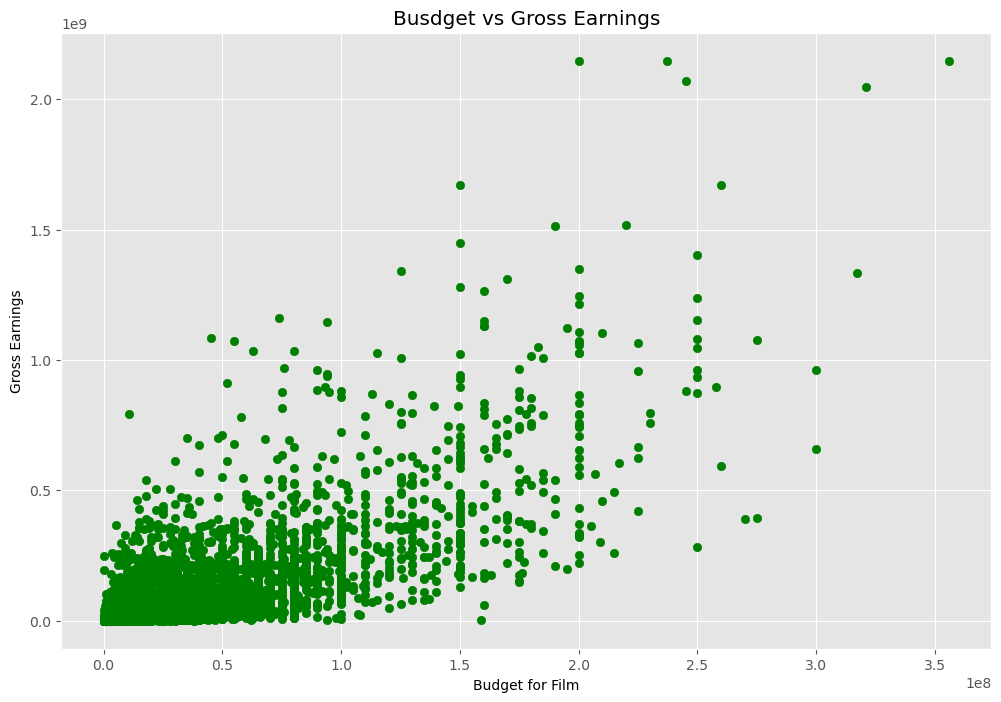

In [15]:
# Scatter plot with budget vs gross

plt.scatter(x = df['budget'] , y = df['gross'] , color ='green' )
plt.title('Busdget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')

<Axes: xlabel='budget', ylabel='gross'>

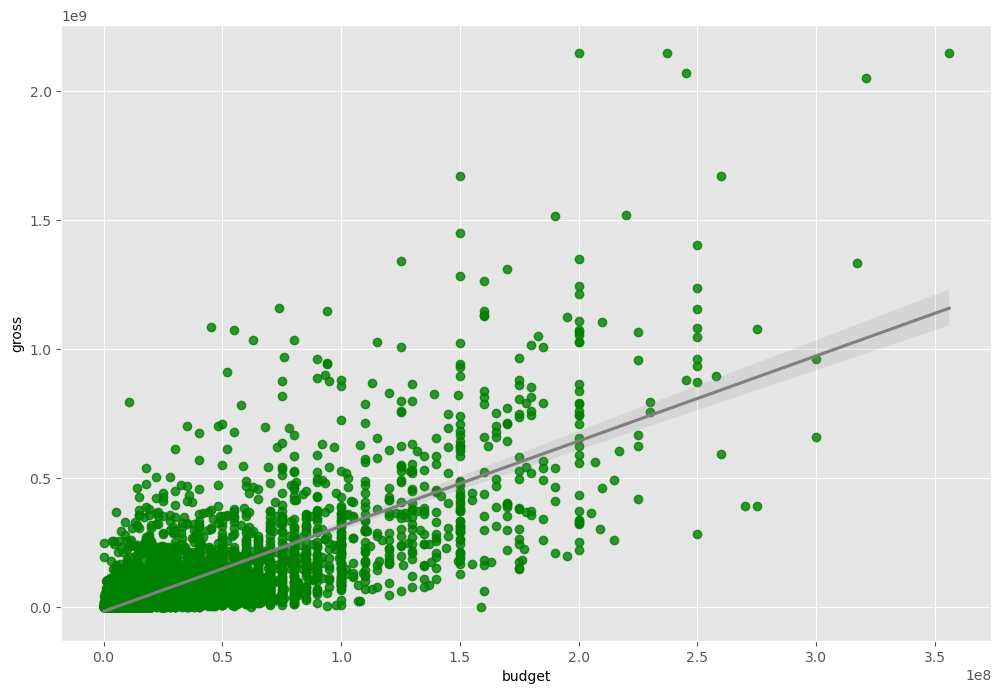

In [16]:
# plot budget vs gross using seaborn

sns.regplot(x = 'budget' , y = 'gross' , data = df , scatter_kws = {'color':'green'} , line_kws={'color':'grey'})

In [17]:
# looking at the correlation (Pearson)

df.corr()

C:\Users\Ookmk\AppData\Local\Temp\ipykernel_15632\3476760218.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,score,votes,budget,gross,runtime,released year
year,1.000000,0.056386,0.206021,0.327722,0.277715,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.224092,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.618978,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.744928,0.318695,0.320312
gross,0.277715,0.224092,0.618978,0.744928,1.000000,0.275789,0.272036
runtime,0.075077,0.414068,0.352303,0.318695,0.275789,1.000000,0.075294
released year,0.998726,0.061923,0.203098,0.320312,0.272036,0.075294,1.000000


C:\Users\Ookmk\AppData\Local\Temp\ipykernel_15632\3857713764.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Text(120.72222222222221, 0.5, 'Movie Features')

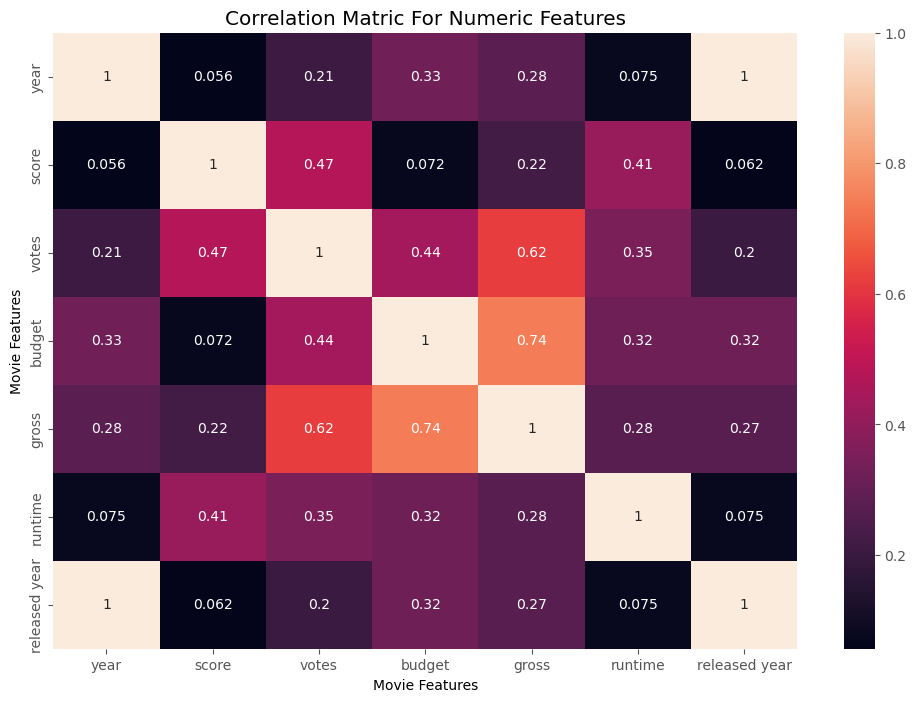

In [18]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix , annot = True)

plt.title('Correlation Matric For Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

In [19]:
# Numerizing the data
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.sort_values(by='gross').head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released country,released date,released year
3203,4966,5,4,1997,2152,5.7,5800,651,161,1811,47,15000000,309.0,504,85.0,6,1997-10-01,1997
272,2909,6,9,1982,1525,3.9,2300,261,55,1473,47,800000,2270.0,582,85.0,47,1982-03-12,1982
3681,1595,3,6,2000,1721,6.8,43000,952,1683,527,6,5000000,2554.0,466,108.0,8,2001-05-11,2001
2434,2969,5,0,1993,1467,4.5,1900,1805,3102,186,47,5000000,2970.0,1376,97.0,39,1994-06-04,1994
5640,3794,6,6,2009,890,5.8,3500,585,2924,1498,47,3000000,5073.0,1385,96.0,41,2015-01-15,2015


C:\Users\Ookmk\AppData\Local\Temp\ipykernel_15632\3299038654.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  numerized_correlation = df_numerized.corr()


<Axes: >

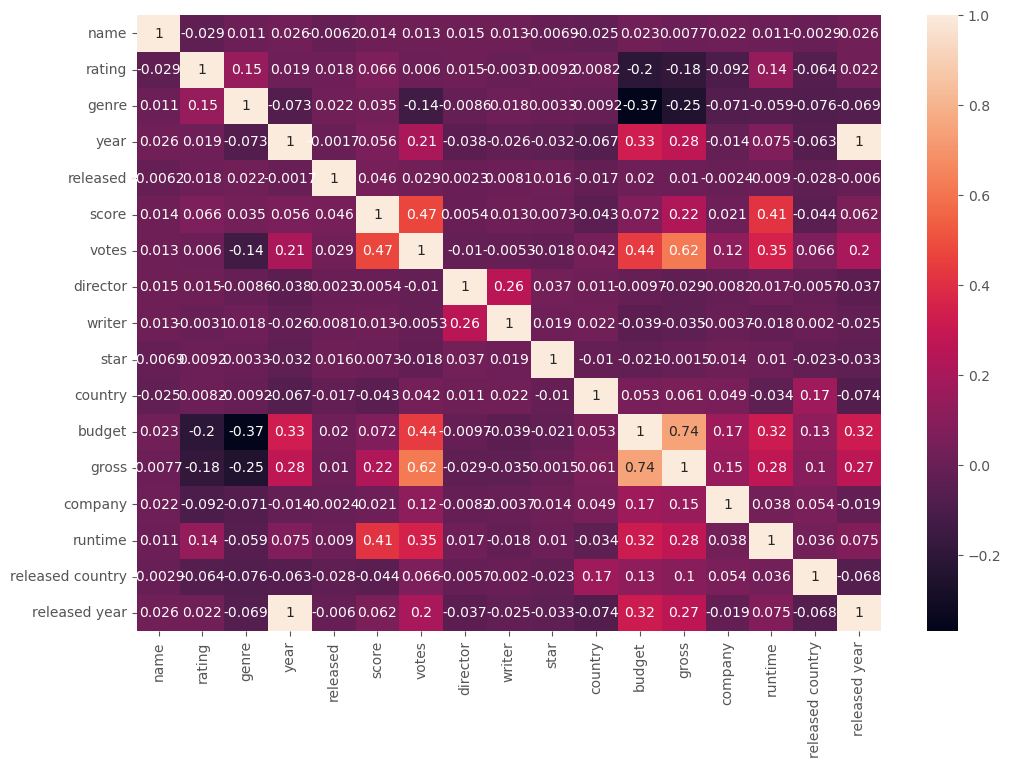

In [20]:
# Heatmap with the numerized df 
numerized_correlation = df_numerized.corr()

sns.heatmap(numerized_correlation , annot = True)

In [21]:
numerized_correlation


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released country,released year
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.007668,0.021697,0.010850,-0.002908,0.025542
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.184872,-0.092357,0.140792,-0.063883,0.022021
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.246831,-0.071334,-0.059237,-0.075552,-0.069147
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.277715,-0.014333,0.075077,-0.062768,0.998726
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.010430,-0.002407,0.008975,-0.027578,-0.005989
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.224092,0.020656,0.414068,-0.043528,0.061923
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.618978,0.118470,0.352303,0.066105,0.203098
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.028713,-0.008223,0.017433,-0.005705,-0.037371
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035446,-0.003697,-0.017561,0.001983,-0.025495
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.001480,0.014082,0.010108,-0.023346,-0.032687


In [22]:
# Displaying the high correlationed metrics 

correlation_mat = numerized_correlation

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values()

high_corr = sorted_pairs[(sorted_pairs) > 0.5] 

high_corr

votes             gross               0.618978
gross             votes               0.618978
                  budget              0.744928
budget            gross               0.744928
year              released year       0.998726
released year     year                0.998726
name              name                1.000000
writer            writer              1.000000
runtime           runtime             1.000000
company           company             1.000000
gross             gross               1.000000
budget            budget              1.000000
country           country             1.000000
star              star                1.000000
director          director            1.000000
votes             votes               1.000000
score             score               1.000000
released          released            1.000000
year              year                1.000000
genre             genre               1.000000
rating            rating              1.000000
released coun

In [23]:
# Inserting SQLite Queries

con = sqlite3.connect('movies.db')
cur = con.cursor()
cur.execute('DROP TABLE IF EXISTS movies')
df.to_sql('movies' , con , index = False)

5421

In [26]:
# Exploring The Data 
statment = '''select "name" , "votes" , 
"where budget" > 256000000 from movies limit 10'''
cur.execute(statment)
output = cur.fetchall()
for row in output:
    print(row)
    

('The Shining', 927000, 1)
('The Blue Lagoon', 65000, 1)
('Star Wars: Episode V - The Empire Strikes Back', 1200000, 1)
('Airplane!', 221000, 1)
('Caddyshack', 108000, 1)
('Friday the 13th', 123000, 1)
('The Blues Brothers', 188000, 1)
('Raging Bull', 330000, 1)
('Superman II', 101000, 1)
('The Long Riders', 10000, 1)


In [27]:
statment = '''select "name" , "score" 
from movies 
Group by "score" 
order by "score" desc 
limit 10'''
cur.execute(statment)
output = cur.fetchall()
for row in output:
    print(row)

('The Shawshank Redemption', 9.3)
('The Dark Knight', 9.0)
("Schindler's List", 8.9)
('Forrest Gump', 8.8)
('Star Wars: Episode V - The Empire Strikes Back', 8.7)
('The Silence of the Lambs', 8.6)
('Back to the Future', 8.5)
('The Shining', 8.4)
('Scarface', 8.3)
('Raging Bull', 8.2)


In [28]:
cur.close

<function Cursor.close()>